In [ ]:
#John's Code Start's Here

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

#Load Data
TheData_df = pd.read_csv('DataFiles/FINAL_CLEANED_DF.csv')
Data = TheData_df

#Run .Head()
Data.head()

,Title,Domestic Release Date,Year Released (Domestic),Month Released (Domestic),Infl. Adj. Dom. Box Office,Domestic Box Office,Genre,Oscars Won,Number Oscars Won,Total Oscars Awarded in Year,Awards,Metascore,IMDB,Rotten Tomatoes,Rated,Director,Runtime,Theatrical Distributor,Country
0,Pirates of the Caribbean: Dead Man’…,2006-07-07 00:00:00,2006,7,588764432,423315812,Adventure,Yes,1,25,Won 1 Oscar. Another 43 wins & 53 nominations.,53.0,7.3,53%,PG-13,Gore Verbinski,151 min,Walt Disney,USA
1,Star Wars: The Rise of Skywalker,2019-12-20 00:00:00,2019,12,515202542,515202542,Adventure,No,0,25,Nominated for 3 Oscars. Another 7 wins & 35 no...,53.0,6.7,51%,PG-13,J.J. Abrams,142 min,Walt Disney,USA
2,Pirates of the Caribbean: The Curse o…,2003-07-09 00:00:00,2003,7,461408382,305410819,Adventure,No,0,25,Nominated for 5 Oscars. Another 38 wins & 99 n...,63.0,8.0,79%,PG-13,Gore Verbinski,143 min,Walt Disney,USA
3,"The Chronicles of Narnia: The Lion, t…",2005-12-09 00:00:00,2005,12,412335608,291710957,Adventure,Yes,1,25,Won 1 Oscar. Another 17 wins & 46 nominations.,75.0,6.9,76%,PG,Andrew Adamson,143 min,Walt Disney,"UK, USA"
4,Pirates of the Caribbean: At World’…,2007-05-24 00:00:00,2007,5,409712211,309420425,Adventure,No,0,25,Nominated for 2 Oscars. Another 20 wins & 44 n...,50.0,7.1,44%,PG-13,Gore Verbinski,169 min,Walt Disney,USA


In [ ]:
#Group By Year
# YearReleased = Data.groupby('Year Released (Domestic)')
# CountYR = YearReleased['Year Released (Domestic)'].count()
# CountYR

#I don't think we need to go through data year over year. The difference is 
    #5 data sets vs 5*40 data sets 
    
#This is useful to check if we have all of our data

In [2]:
#Define Data Set Groups
d = {'Month Released (Domestic)': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
     'Data Set': ['Winter Dump Months', 
                    'Winter Dump Months', 
                    'Other Months', 
                    'Other Months', 
                    'Summer Blockbusters',
                    'Summer Blockbusters',
                    'Summer Blockbusters',
                    'Summer Dump Months',
                    'Summer Dump Months',
                    'Other Months',
                    'Oscar Season',
                    'Oscar Season',
                   ]}
DataSets_df = pd.DataFrame(data=d)
DataSets_df

,Month Released (Domestic),Data Set
0,1,Winter Dump Months
1,2,Winter Dump Months
2,3,Other Months
3,4,Other Months
4,5,Summer Blockbusters
5,6,Summer Blockbusters
6,7,Summer Blockbusters
7,8,Summer Dump Months
8,9,Summer Dump Months
9,10,Other Months


In [3]:
SummData = pd.merge(Data, DataSets_df, 
                      how="left", on='Month Released (Domestic)')
SummData.head()

,Title,Domestic Release Date,Year Released (Domestic),Month Released (Domestic),Infl. Adj. Dom. Box Office,Domestic Box Office,Genre,Oscars Won,Number Oscars Won,Total Oscars Awarded in Year,Awards,Metascore,IMDB,Rotten Tomatoes,Rated,Director,Runtime,Theatrical Distributor,Country,Data Set
0,Pirates of the Caribbean: Dead Man’…,2006-07-07 00:00:00,2006,7,588764432,423315812,Adventure,Yes,1,25,Won 1 Oscar. Another 43 wins & 53 nominations.,53.0,7.3,53%,PG-13,Gore Verbinski,151 min,Walt Disney,USA,Summer Blockbusters
1,Star Wars: The Rise of Skywalker,2019-12-20 00:00:00,2019,12,515202542,515202542,Adventure,No,0,25,Nominated for 3 Oscars. Another 7 wins & 35 no...,53.0,6.7,51%,PG-13,J.J. Abrams,142 min,Walt Disney,USA,Oscar Season
2,Pirates of the Caribbean: The Curse o…,2003-07-09 00:00:00,2003,7,461408382,305410819,Adventure,No,0,25,Nominated for 5 Oscars. Another 38 wins & 99 n...,63.0,8.0,79%,PG-13,Gore Verbinski,143 min,Walt Disney,USA,Summer Blockbusters
3,"The Chronicles of Narnia: The Lion, t…",2005-12-09 00:00:00,2005,12,412335608,291710957,Adventure,Yes,1,25,Won 1 Oscar. Another 17 wins & 46 nominations.,75.0,6.9,76%,PG,Andrew Adamson,143 min,Walt Disney,"UK, USA",Oscar Season
4,Pirates of the Caribbean: At World’…,2007-05-24 00:00:00,2007,5,409712211,309420425,Adventure,No,0,25,Nominated for 2 Oscars. Another 20 wins & 44 n...,50.0,7.1,44%,PG-13,Gore Verbinski,169 min,Walt Disney,USA,Summer Blockbusters


In [4]:
Summary_df = SummData.groupby("Data Set").agg({'Title':'count', 
                                                'Infl. Adj. Dom. Box Office':'mean'#, 
                                                #'Oscars Won':'count' 
                                              })

Summary_df.head()

,Title,Infl. Adj. Dom. Box Office
Data Set,,
Oscar Season,440,1.887246e+08
Other Months,272,1.526165e+08
Summer Blockbusters,591,2.120567e+08
Summer Dump Months,176,1.419209e+08
Winter Dump Months,110,1.368063e+08


In [ ]:
#Make Box Office Look Good
Summary_df['Infl. Adj. Dom. Box Office'] = Summary_df[
    'Infl. Adj. Dom. Box Office'].astype(
     float).map("${:,.2f}".format)

Summary_df
#Need to add Average to "Inflation Adjusted Box Office"

In [ ]:
labels = ['Oscar Season', 'Other Months', 'Summer Blockbusters', 
          'Summer Dump Months', 'Winter Dump Months']
titlecount = Summary_df['Title']


x_axis = np.arange(len(labels))  # the label locations


plt.bar(x, titlecount, color='r', align='center')

ticks = [value for value in x_axis]
plt.xticks(ticks, labels, rotation=45)

# Set textual properties
plt.title("Number of Top 40 Movies Since 1980")
plt.ylabel("Count of Movies")
plt.xlabel("Season")
plt.tight_layout()
plt.show()



In [ ]:
labels2 = ['Oscar Season', 'Other Months', 'Summer Blockbusters', 
          'Summer Dump Months', 'Winter Dump Months']
titlecount = Summary_df['Title']


x_axis = np.arange(len(labels))  # the label locations


plt.bar(x, titlecount, color='r', align='center')

ticks = [value for value in x_axis]
plt.xticks(ticks, labels, rotation=45)

# Set textual properties
plt.title("Number of Top 40 Movies Since 1980")
plt.ylabel("Count of Movies")
plt.xlabel("Season")
plt.tight_layout()
plt.show()

In [ ]:
#John's code ends here

In [ ]:
#Nicole's code starts here

In [ ]:
# Load cleaned data
FINAL_CLEANED_DF = pd.read_csv('DataFiles/FINAL_CLEANED_DF.csv')

In [ ]:
# Account for NaN values in genre
FINAL_CLEANED_DF['Genre'] = FINAL_CLEANED_DF['Genre'].fillna('Unspecified')

In [ ]:
# Genre Groupby
genre_df = FINAL_CLEANED_DF.groupby('Genre').agg({'Genre':'count','Infl. Adj. Dom. Box Office':
                                                ['sum', 'mean'], 'Number Oscars Won': 'sum'})
# Genre DataFrame
genre_df.columns = ['# of Movies', 'Box Office Sum', 'Box Office Mean', 'Oscars Won']

# Reset index so genre turned into a column
genre_df = genre_df.reset_index()

# Change Oscars Won to integer
genre_df['Oscars Won'] = genre_df['Oscars Won'].astype(int)

# Change Box Office format from exponent to integer
genre_df['Box Office Mean'] = genre_df['Box Office Mean'].astype('int64')

# Display Genre DataFrame
genre_df

In [ ]:
# Pie Chart of Oscars Won Per Genre

# Removing Zero Values to make plot look nicer
non_zero_values_df = genre_df.loc[(genre_df['Oscars Won'] > 0), :].sort_values('Oscars Won')

# Create Plot
oscars = non_zero_values_df['Oscars Won']
labels = non_zero_values_df['Genre']
plt.rc('font', size = 12)
colors = ['pink', 'dimgray', 'peru', 'deeppink', 'darkviolet', 'plum',
          'tomato', 'limegreen', 'y', 'darkturquoise']
fig, ax = plt.subplots()
ax.axis('equal')
pie = ax.pie(oscars, radius=2.55, colors=['k'])
pie2 = ax.pie(oscars, radius=2.5, labels = labels, labeldistance = 1.06, autopct = '%1.1f%%',
             startangle=200, colors = colors)
fig.suptitle('Percent of Oscars Won By Genre', fontsize=16, y= 1.4)

plt.show()

In [ ]:
# Bar Chart of Total Box Office Sales Per Genre
revenue = genre_df['Box Office Sum']
genre = genre_df['Genre']
colors = ['limegreen', 'y', 'gray', 'darkviolet', 'yellowgreen', 'pink',
          'darkturquoise', 'dimgray', 'plum', 'deeppink', 'tomato', 'orange', 'peru']
plt.figure(figsize = (12,6))
plt.bar(genre, revenue, color = colors)
yticks = np.arange(0, 100000000000, 10000000000)
ylabels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.yticks(ticks = yticks, labels = ylabels)
plt.xticks(rotation = 90)
plt.title("Total Box Office Sales Per Genre")
plt.xlabel('Genre')
plt.ylabel('Box Office Sales (billions)')

# plt.tight_layout() 

plt.show()

In [ ]:
# Bar Chart of Mean Box Office Sales Per Genre
revenue = genre_df['Box Office Mean']
genre = genre_df['Genre']
plt.figure(figsize = (12,6))
plt.bar(genre, revenue, color = colors)
yticks = np.arange(0, 250000000, 25000000)
ylabels = [0, 25, 50, 75, 100, 125, 150, 175, 200, 250]
plt.yticks(ticks = yticks, labels = ylabels)
plt.xticks(rotation = 90)
plt.title("Mean Box Office Sales Per Genre")
plt.xlabel('Genre')
plt.ylabel('Box Office Sales (millions)')
plt.rc('xtick' , labelsize = 14)
# plt.tight_layout() 

plt.show()

In [ ]:
revenue_sum = genre_df['Box Office Sum']
revenue_mean = genre_df['Box Office Mean']
genre = genre_df['Genre']

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Box Office Sales Per Genre')
# plt.figure(figsize = (12,3))
plt.xticks(rotation = 90)


ax1.bar(genre, revenue_sum, color = colors)
ax1.set_ylabel('Revenue')
ax1.set_title('xxx')

ax2.bar(genre, revenue_mean, color = colors)
ax2.set_ylabel('Revenue')
ax2.set_title('yyy')


# plt.tight_layout() 
plt.show()

In [ ]:
#Nicole's code ends here

In [ ]:
#Jason's code starts here

In [5]:
SummData.head(5)

,Title,Domestic Release Date,Year Released (Domestic),Month Released (Domestic),Infl. Adj. Dom. Box Office,Domestic Box Office,Genre,Oscars Won,Number Oscars Won,Total Oscars Awarded in Year,Awards,Metascore,IMDB,Rotten Tomatoes,Rated,Director,Runtime,Theatrical Distributor,Country,Data Set
0,Pirates of the Caribbean: Dead Man’…,2006-07-07 00:00:00,2006,7,588764432,423315812,Adventure,Yes,1,25,Won 1 Oscar. Another 43 wins & 53 nominations.,53.0,7.3,53%,PG-13,Gore Verbinski,151 min,Walt Disney,USA,Summer Blockbusters
1,Star Wars: The Rise of Skywalker,2019-12-20 00:00:00,2019,12,515202542,515202542,Adventure,No,0,25,Nominated for 3 Oscars. Another 7 wins & 35 no...,53.0,6.7,51%,PG-13,J.J. Abrams,142 min,Walt Disney,USA,Oscar Season
2,Pirates of the Caribbean: The Curse o…,2003-07-09 00:00:00,2003,7,461408382,305410819,Adventure,No,0,25,Nominated for 5 Oscars. Another 38 wins & 99 n...,63.0,8.0,79%,PG-13,Gore Verbinski,143 min,Walt Disney,USA,Summer Blockbusters
3,"The Chronicles of Narnia: The Lion, t…",2005-12-09 00:00:00,2005,12,412335608,291710957,Adventure,Yes,1,25,Won 1 Oscar. Another 17 wins & 46 nominations.,75.0,6.9,76%,PG,Andrew Adamson,143 min,Walt Disney,"UK, USA",Oscar Season
4,Pirates of the Caribbean: At World’…,2007-05-24 00:00:00,2007,5,409712211,309420425,Adventure,No,0,25,Nominated for 2 Oscars. Another 20 wins & 44 n...,50.0,7.1,44%,PG-13,Gore Verbinski,169 min,Walt Disney,USA,Summer Blockbusters


In [6]:
analysis_box_office = SummData[["Year Released (Domestic)", "Infl. Adj. Dom. Box Office", "Data Set"]]
analysis_box_office.head()

,Year Released (Domestic),Infl. Adj. Dom. Box Office,Data Set
0,2006,588764432,Summer Blockbusters
1,2019,515202542,Oscar Season
2,2003,461408382,Summer Blockbusters
3,2005,412335608,Oscar Season
4,2007,409712211,Summer Blockbusters


In [7]:
summer_bb = analysis_box_office[["Infl. Adj. Dom. Box Office", "Data Set"]]
summer_bb.head()

,Infl. Adj. Dom. Box Office,Data Set
0,588764432,Summer Blockbusters
1,515202542,Oscar Season
2,461408382,Summer Blockbusters
3,412335608,Oscar Season
4,409712211,Summer Blockbusters


In [8]:
summerbb_df = summer_bb[summer_bb["Data Set"] == 'Summer Blockbusters']
summerbb_df = summerbb_df.rename(columns={"Data Set": "Release_Group",
                                            "Infl. Adj. Dom. Box Office": "Box_office"
                                      })
summerbb_df.head()

,Box_office,Release_Group
0,588764432,Summer Blockbusters
2,461408382,Summer Blockbusters
4,409712211,Summer Blockbusters
5,386651621,Summer Blockbusters
7,364078672,Summer Blockbusters


In [9]:
not_summer_df = summer_bb[summer_bb["Data Set"] != 'Summer Blockbusters']
not_summer_df = not_summer_df.rename(columns={"Data Set": "Release_Group",
                                            "Infl. Adj. Dom. Box Office": "Box_office"
                                     })
not_summer_df.head()

,Box_office,Release_Group
1,515202542,Oscar Season
3,412335608,Oscar Season
6,381836094,Oscar Season
8,339231493,Oscar Season
11,283285507,Oscar Season


In [10]:
# Calculate Pvalue for Box office amounts usingthe t-test
sts.ttest_ind(summerbb_df.Box_office, not_summer_df.Box_office, equal_var=False)

Ttest_indResult(statistic=6.895047163278541, pvalue=9.549285292519311e-12)

The pvalue is way lower that .05 so we can say that this proves the Hypothesis due to the disproving of the Null Hypothesis. This shows that the odds that this happened by chance is way too small.

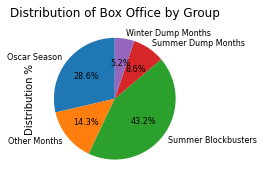

In [30]:
# The index can be reset to provide index numbers based on the new rankings.
pie_df = analysis_box_office[["Infl. Adj. Dom. Box Office", "Data Set"]]
pie_df.head()

grouped_by_group = pie_df.groupby(["Data Set"])
grouped_df = grouped_by_group["Infl. Adj. Dom. Box Office"].sum()

groups_cnts_df = pd.DataFrame({"Sums": grouped_df})

# place gender keys for the sums
group_list = groups_cnts_df.keys()

ax1 = plt.subplot(121, aspect='equal')
movie_pie = groups_cnts_df.plot(kind="pie", y=group_list[0], ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=8, title=("Distribution of Box Office by Group"))
movie_pie.set_ylabel("Distribution %")

plt.show()

In [11]:
analysis_oscars = SummData[["Number Oscars Won", "Data Set"]]
analysis_oscars.head(100)

,Number Oscars Won,Data Set
0,1,Summer Blockbusters
1,0,Oscar Season
2,0,Summer Blockbusters
3,1,Oscar Season
4,0,Summer Blockbusters
...,...,...
95,0,Oscar Season
96,0,Summer Blockbusters
97,0,Summer Blockbusters
98,11,Oscar Season


In [12]:
oscar_season_df = analysis_oscars[analysis_oscars["Data Set"] == 'Oscar Season']
oscar_season_df = oscar_season_df.rename(columns={"Data Set": "Release_Group",
                                            "Number Oscars Won": "Oscars"
                                      })
oscar_season_df.head()

,Oscars,Release_Group
1,0,Oscar Season
3,1,Oscar Season
6,0,Oscar Season
8,0,Oscar Season
11,0,Oscar Season


In [13]:
non_oscar_season_df = analysis_oscars[analysis_oscars["Data Set"] != 'Oscar Season']
non_oscar_season_df = non_oscar_season_df.rename(columns={"Data Set": "Release_Group",
                                            "Number Oscars Won": "Oscars"
                                      })
non_oscar_season_df.head()

,Oscars,Release_Group
0,1,Summer Blockbusters
2,0,Summer Blockbusters
4,0,Summer Blockbusters
5,0,Summer Blockbusters
7,0,Summer Blockbusters


In [14]:
# Calculate Pvalue for Box Office Wins using the t-test
sts.ttest_ind(oscar_season_df.Oscars, non_oscar_season_df.Oscars, equal_var=False)

Ttest_indResult(statistic=5.759961184245013, pvalue=1.4344115626241155e-08)

The pvalue is way lower that .05 so we can say that this proves the Hypothesis due to the disproving of the Null Hypothesis. This shows that the odds that this happened by chance is way too small.

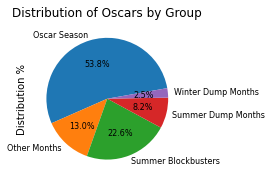

In [35]:
# The index can be reset to provide index numbers based on the new rankings.
pie2_df = analysis_oscars[["Number Oscars Won", "Data Set"]]
pie2_df.head()

oscars_by_group = pie2_df.groupby(["Data Set"])
grouped_oscar_df = oscars_by_group["Number Oscars Won"].sum()

groups_oscar_cnts_df = pd.DataFrame({"Sums": grouped_oscar_df})

# place gender keys for the sums
group_oscar_list = groups_oscar_cnts_df.keys()

ax1 = plt.subplot(121, aspect='equal')
movie_oscar_pie = groups_oscar_cnts_df.plot(kind="pie", y=group_oscar_list[0], ax=ax1, autopct='%1.1f%%', 
 startangle=10, shadow=False, legend = False, fontsize=8, title=("Distribution of Oscars by Group"))
movie_oscar_pie.set_ylabel("Distribution %")

plt.show()

In [ ]:
#Jason's code ends here

In [ ]:
#Marianne's code starts here

In [15]:
# Total Number of Oscars Won by Data Group (Time of Year) Bar Chart - Marianne


# SummData.head()

Oscar_Time_of_Year = SummData.groupby("Data Set").agg({"Data Set":"count","Number Oscars Won":"sum"})
Oscar_Time_of_Year.columns.values[0] = "Number of Movies"

allMovies = Oscar_Time_of_Year["Number of Movies"].sum()
allOscars = Oscar_Time_of_Year["Number Oscars Won"].sum()

Oscar_Time_of_Year["% of All Movies"] = Oscar_Time_of_Year["Number of Movies"] / allMovies * 100

Oscar_Time_of_Year["% of All Oscars"] = Oscar_Time_of_Year["Number Oscars Won"] / allOscars * 100


Oscar_Time_of_Year



# Summary_df = SummData.groupby("Data Set").agg({'Title':'count', 
#                                                 'Infl. Adj. Dom. Box Office':'mean'#, 
#                                                 #'Oscars Won':'count' 
#                                               })



,Number of Movies,Number Oscars Won,% of All Movies,% of All Oscars
Data Set,,,,
Oscar Season,440,303,27.690371,53.818828
Other Months,272,73,17.117684,12.966252
Summer Blockbusters,591,127,37.193203,22.557726
Summer Dump Months,176,46,11.076149,8.170515
Winter Dump Months,110,14,6.922593,2.486679


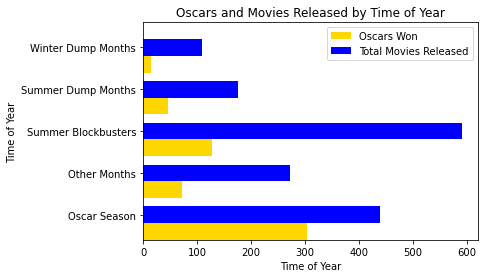

In [16]:
ind = np.arange(len(Oscar_Time_of_Year))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, Oscar_Time_of_Year['Number Oscars Won'], width, color='gold', label='Oscars Won')
ax.barh(ind + width, Oscar_Time_of_Year['Number of Movies'], width, color='blue', label='Total Movies Released')


ax.set(yticks=ind + width, yticklabels=Oscar_Time_of_Year.index.values, ylim=[2*width - 1, len(Oscar_Time_of_Year)])
ax.legend()
ax.set_title('Oscars and Movies Released by Time of Year')
plt.ylabel("Time of Year")
plt.xlabel("Time of Year")
plt.show()


The highest proportion of Oscars Won is from movies released during Oscar Season, however this doesn't really paint an accurate picture. Comparing the raw number of movies doesn't tell the whole story - seeing the relative proportion of movies in each category tells a better story. (See below.)

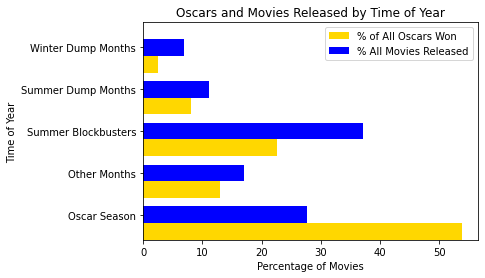

In [17]:
ind = np.arange(len(Oscar_Time_of_Year))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, Oscar_Time_of_Year['% of All Oscars'], width, color='gold', label='% of All Oscars Won')
ax.barh(ind + width, Oscar_Time_of_Year['% of All Movies'], width, color='blue', label='% All Movies Released')


ax.set(yticks=ind + width, yticklabels=Oscar_Time_of_Year.index.values, ylim=[2*width - 1, len(Oscar_Time_of_Year)])
ax.legend()
ax.set_title('Oscars and Movies Released by Time of Year')
plt.ylabel("Time of Year")
plt.xlabel("Percentage of Movies")
plt.show()

Comparing the percentages is a better way to see the picture of Oscar success based on time of year. 53.8% of all Oscar winners are released during Oscar season, but only 27.7% of all movies come out during that time of year, meaning movies released during Oscar season are far more likely to win awards. It's also interesting to note that, while Summer Blockbusters win fewer awards than we would expect if time of year didn't matter, it's the second most likely release timeframe for awards.

The r-squared is: 0.1451858598097737


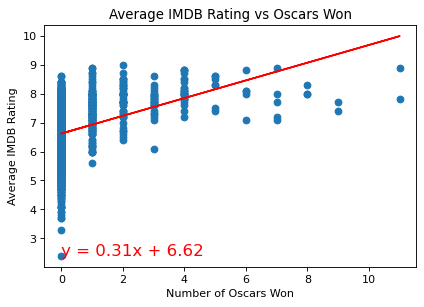

In [18]:
# Scatterplot of IMDB ratings vs. oscars won (for the top oscar winners) - with regression line - Marianne

x_values = SummData['Number Oscars Won']
y_values = SummData['IMDB']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#create plot
plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

#create line equation and annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15,color="red")

#label the axes and create title
plt.xlabel("Number of Oscars Won")
plt.ylabel("Average IMDB Rating")
plt.title("Average IMDB Rating vs Oscars Won")

#calculate and print r squared to determine strength of correlation
print(f'The r-squared is: {rvalue**2}')

plt.show()

Based on this regression line and the r-squared, there doesn't appear to be a correlation between awards won and viewer rating. While there aren't many movies winning Oscars with low ratings, there is a large number of highly rated movies winning no Oscars.

The r-squared is: 0.16806578860883292


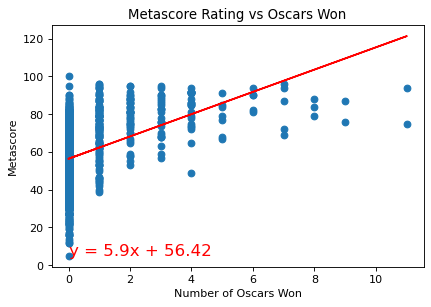

In [19]:
# Scatterplot of metaScore ratings vs. oscars won (for the top oscar winners) - with regression line - Marianne

metaScore = SummData.dropna(subset=['Metascore'])

x_values = metaScore['Number Oscars Won']
y_values = metaScore['Metascore']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#create plot
plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

#create line equation and annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15,color="red")

#label the axes and create title
plt.xlabel("Number of Oscars Won")
plt.ylabel("Metascore")
plt.title("Metascore Rating vs Oscars Won")

#calculate and print r squared to determine strength of correlation
print(f'The r-squared is: {rvalue**2}')

plt.show()

With an r-squared of .168, there is little correlation between critical ratings and Oscar success. 

The r-squared is: 0.05419269973970762


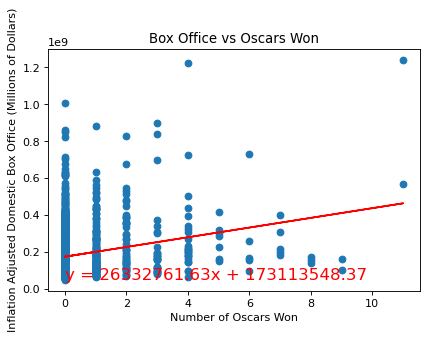

In [20]:
# Scatter Plot of box office vs number of oscars won

x_values = SummData['Number Oscars Won']
y_values = SummData['Infl. Adj. Dom. Box Office']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#create plot
plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

#create line equation and annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15,color="red")

#label the axes and create title
plt.xlabel("Number of Oscars Won")
plt.ylabel("Inflation Adjusted Domestic Box Office (Millions of Dollars)")
plt.title("Box Office vs Oscars Won")

#calculate and print r squared to determine strength of correlation
print(f'The r-squared is: {rvalue**2}')

plt.show()

This regression shows that there is no real correlation between box office success and awards won, as the r-squared is .054, even lower than the other regressions run on Oscars.

In [21]:
#Create the lists of box office values for the box plot

OscarsOnly_df = SummData.loc[SummData['Oscars Won'] == 'Yes'] #filter the dataframe to oscar winners

OscarMoney = OscarsOnly_df['Infl. Adj. Dom. Box Office']       #save the list of box office values of oscar winners


NoOscars_df = SummData.loc[SummData['Oscars Won'] == 'No']     #filter the dataframe to non-oscar winners
    
OscarlessMoney = NoOscars_df['Infl. Adj. Dom. Box Office']     #save the list of box office values of non-winners
    


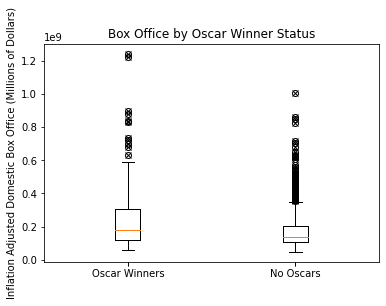

In [22]:
# Create a box plot comparing the box office of oscar winners vs. non winners

#Create the list of all movies
allMovies = [OscarMoney, OscarlessMoney]

#plot the data
fig, ax = plt.subplots()
ax.boxplot(allMovies)

# change outlier point symbols
ax.boxplot(allMovies, 0, 'x')

#label the graph
ax.set_xticklabels(['Oscar Winners', 'No Oscars'])
ax.set_ylabel('Inflation Adjusted Domestic Box Office (Millions of Dollars)')
ax.set_title('Box Office by Oscar Winner Status')

plt.show()

Based on this plot, Oscar winners have a wider range of box office earnings. However, both datasets have a large number of outliers that can skew other analyses.

In [ ]:
#Marianne's code ends here